Выполнил: Ершов Артём

Вариант: 9

---
Будем моделировать асимптотический ДИ уровня $\gamma = 0.95$.

По ЦПТ:
$$
\frac{\bar X - mp}{\tilde s} \sqrt n \to N(0, 1)
$$

$$
P\left( g_1 < \frac{\bar X - mp}{\tilde s} \sqrt n < g_2 \right) \to \gamma,
$$
где $g_1, g_2$ - квантили стандартного нормального распределения уровня $0.025$ и $0.975$ соответственно.

Тогда асимптотический ДИ для параметра $p$ есть
$$
\left(
    \frac{1}{m} \left(\bar X - \frac{g_2 \tilde s}{\sqrt n} \right),
    \frac{1}{m} \left(\bar X - \frac{g_1 \tilde s}{\sqrt n} \right)
\right)
$$
Проверим, как часто такой интервал накрывает параметр $p$ при больших объёмах выборки. Для этого сгенерируем много выборок с известным значением $p$, для каждой построим ДИ и проверим, попадёт ли в этот ДИ значение $p$.

In [1]:
import numpy as np
from scipy.stats import binom, norm
from tqdm import trange, tqdm
import matplotlib.pyplot as plt

In [2]:
m = 100
p = 0.5
n = 100000
T = 1000  # число выборок

g1 = norm.ppf(0.025) # квантили нормального распределения
g2 = norm.ppf(0.975)

np.random.seed(0)
c = 0
for i in trange(T):
    distr = binom(m, p)
    sample = distr.rvs(size=n)


    mean = np.mean(sample)
    s = np.std(sample, ddof=1)   # несмещённая выборочная дисперсия

    left = (mean - g2 * s / np.sqrt(n)) / m
    right = (mean - g1 * s / np.sqrt(n)) / m
    if left < p < right:
        c += 1
print(c / T)

100%|██████████| 1000/1000 [00:07<00:00, 130.75it/s]

0.952


Как видно, истинное значение $p$ накрывается с должной вероятностью.

Построим теперь зависимость ширины асимптотического ДИ от объёма выборки.

100%|██████████| 1000/1000 [00:00<00:00, 2094.50it/s]


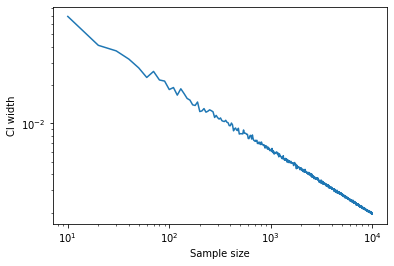

In [3]:
MAXN = 10000
STEP = 10

n_values = np.arange(STEP, MAXN + STEP, STEP)
width = np.zeros(len(n_values))

m = 100
p = 0.5
n = 100000

g1 = norm.ppf(0.025) # квантили нормального распределения
g2 = norm.ppf(0.975)

distr = binom(m, p)

np.random.seed(0)

for i, n in enumerate(tqdm(n_values)):
    sample = distr.rvs(size=n)
    mean = np.mean(sample)
    s = np.std(sample, ddof=1)   # несмещённая выборочная дисперсия

    left = (mean - g2 * s / np.sqrt(n)) / m
    right = (mean - g1 * s / np.sqrt(n)) / m
    width[i] = right - left
    
fig, ax = plt.subplots()
ax.plot(n_values, width)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Sample size')
ax.set_ylabel('CI width');

Видно, что ширина интервала убывает со скоростью, пропорциональной $\sqrt n$ (т.е. со скоростью сходимости ЦПТ).